In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xtrack as xt
import xdeps
import xobjects as xo
from scipy import optimize as opt

In [2]:
def plot_me(myTwiss):
    plt.plot(myTwiss.s,myTwiss.betx,'.-b', label='betx')
    plt.plot(myTwiss.s,myTwiss.bety,'.-r', label='bety')
    plt.ylabel('[m]')
    plt.xlabel('s [m]')
    plt.grid()
    plt.legend()

    plt.figure()
    plt.plot(myTwiss.s,myTwiss.alfx,'.-b', label='alfx')
    plt.plot(myTwiss.s,myTwiss.alfy,'.-r', label='alfx')
    plt.xlabel('s [m]')
    plt.ylabel('')
    plt.grid()
    plt.legend()

    plt.figure()
    plt.plot(myTwiss.s,myTwiss.mux,'.-b', label='mux')
    plt.plot(myTwiss.s,myTwiss.muy,'.-r', label='muy')
    plt.xlabel('s [m]')
    plt.ylabel('2pi')
    plt.grid()
    plt.legend()

    plt.figure()
    plt.plot(myTwiss.s,myTwiss.dx,'.-b', label='dx')
    plt.plot(myTwiss.s,myTwiss.dy,'.-r', label='dy')
    plt.xlabel('s [m]')
    plt.ylabel('[m]')
    plt.grid()
    plt.legend()

# Exercise 3

Design machine for protons at 20 GeV with parameters:
- Circumference = 1000 m
- Quadrupole length = 3.0 m
- 8 FODO cells
- dipole length = 5 m, max field = 3 T


In [3]:
ldipole = 5 #m
lquad = 3 #m
max_field = 3 #T
lring = 1000 #m
p_momentum = 20e9 #GeV
NFODO = 16
lFODO = lring/NFODO #m

Ndipoles = 4*NFODO
gamma = 20e9/938e6 
epsilon_g = 2e-6/gamma
sigma = 3.14e-3
beta_max = (sigma)**2/epsilon_g
lsext = 0.1

def fun(f, L, bmax):
    return (2*f*np.sqrt(4*f+L)/np.sqrt(4*f-L)-bmax)**2

f = opt.minimize(fun, x0=100, args=(lFODO,beta_max))['x'][0]
k = 1/f/lquad
beta_max

105.11300639658847

In [4]:
env = xt.Environment()
env.vars({'lFODO': lFODO,
          'lquad': lquad,
         'ldipole': ldipole,
         'lring': lring,
         'p_momentum': p_momentum,
         'k1f': k,
         'k1d': -k,
         'Ndipoles': Ndipoles,
         'NFODO': NFODO,
         'angle.mb': 2*np.pi/Ndipoles,
         'lsext': lsext,
         'k2s1': 0.0,
         'k2s2': 0.0,
         'k0.mb': 'angle.mb/ldipole'})

env.new('mb', xt.Bend, length='ldipole', k0='k0.mb', h='k0.mb')
env.new('mq', xt.Quadrupole, length='lquad')
env.new('mq.f','mq', k1='k1f')
env.new('mq.d','mq', k1='k1d')
env.new('sx1', xt.Sextupole, length='lsext', k2='k2s1')
env.new('sx2', xt.Sextupole, length='lsext', k2='k2s2')


#at -> the end of the object
fodo = env.new_line(components = [
                    env.place('mq.f', at=env['lquad']/2),
                    env.place('mq.d', at=env['lFODO']/2 + env['lquad']/2),
                    env.place('mb', at=env['lFODO']/6 + env['ldipole']/2),
                    env.place('mb', at=env['lFODO']/3 + env['ldipole']/2),
                    env.place('sx1', at=env['lFODO']/3 + env['ldipole']/2 + env['lFODO']/12),
                    env.place('mb', at=env['lFODO']*4/6 + env['ldipole']/2),
                    env.place('mb', at=env['lFODO']*5/6 + env['ldipole']/2),
                    env.place('sx2', at=env['lFODO']*5/6 + env['ldipole']/2 + env['lFODO']/12),
                    env.new('marker_end', xt.Marker, at=lFODO)
                    ]
                    )
fodo.to_pandas()

,s,element_type,name,isthick,isreplica,parent_name,iscollective,element
0,0.000000,Quadrupole,mq.f,True,False,None,False,"Quadrupole(k1=0.0119, k1s=0, length=3, num_mul..."
1,3.000000,Drift,drift_1,True,False,None,False,Drift(length=7.42)
2,10.416667,Bend,mb,True,False,None,False,"Bend(length=5, k0=0.0196, k1=0, h=0.0196, mode..."
3,15.416667,Drift,drift_2,True,False,None,False,Drift(length=5.42)
4,20.833333,Bend,mb,True,False,None,False,"Bend(length=5, k0=0.0196, k1=0, h=0.0196, mode..."
5,25.833333,Drift,drift_3,True,False,None,False,Drift(length=2.66)
6,28.491667,Sextupole,sx1,True,False,None,False,"Sextupole(k2=0, k2s=0, length=0.1, _order=5, i..."
7,28.591667,Drift,drift_4,True,False,None,False,Drift(length=2.66)
8,31.250000,Quadrupole,mq.d,True,False,None,False,"Quadrupole(k1=-0.0119, k1s=0, length=3, num_mu..."
9,34.250000,Drift,drift_5,True,False,None,False,Drift(length=7.42)


In [5]:
line = env.new_line(components=[env.place(fodo)]*NFODO)
line.particle_ref = xt.Particles(p0c=20e9, #eV
                                 q0=1, mass0=xt.PROTON_MASS_EV)
context = xo.ContextCpu()
line.build_tracker(_context=context)

optimum = line.match(
    method='4d', # <- passed to twiss
    vary=[
        xt.VaryList(['k1f', 'k1d'], step=1e-4),
    ],
    targets = [
        xt.TargetSet('betx', value=beta_max, at=0, tol=1e-6),
        xt.TargetSet('bety', value=beta_max, at=8, tol=1e-6)
    ])


Matching: model call n. 3               

Warning! Need second attempt on closed orbit search


/opt/homebrew/Caskroom/miniconda/base/envs/phd/lib/python3.12/site-packages/xtrack/linear_normal_form.py:185: RuntimeWarning: divide by zero encountered in scalar divide
  n1 = 1./np.sqrt(np.matmul(np.matmul(a1, S), b1))
/opt/homebrew/Caskroom/miniconda/base/envs/phd/lib/python3.12/site-packages/xtrack/linear_normal_form.py:189: RuntimeWarning: invalid value encountered in multiply
  a1 *= n1
/opt/homebrew/Caskroom/miniconda/base/envs/phd/lib/python3.12/site-packages/xtrack/linear_normal_form.py:193: RuntimeWarning: invalid value encountered in multiply
  b1 *= n1


Matching: model call n. 27               



In [6]:
line2 = env.new_line(components=[env.place(fodo)]*NFODO)
line2.particle_ref = xt.Particles(p0c=20e9, #eV
                                 q0=1, mass0=xt.PROTON_MASS_EV)
line2.build_tracker(_context=context)
optimum2 = line2.match(
    method='4d', # <- passed to twiss
    vary=[
        xt.VaryList(['k1f', 'k1d'], step=1e-4),
        xt.VaryList(['k2s1'], step=1e-7),
        xt.VaryList(['k2s2'], step=1e-7),
        xt.VaryList(['lsext'], step=1e-1),
    ],
    targets = [
        xt.TargetSet('betx', value=beta_max, at=0, tol=1e-5),
        xt.TargetSet('bety', value=beta_max, at=8, tol=1e-5),
        xt.TargetSet(dqx=0, dqy=0, tol=1e-6),
    ])

Matching: model call n. 28               



In [7]:
knobs_after_match = optimum2.get_knob_values()
knobs_after_match

{'k1f': 0.006620754702821407,
 'k1d': -0.00796830167912218,
 'k2s1': -0.007520597272066609,
 'k2s2': 0.005371140927153293,
 'lsext': 0.10001419281501395}

-7.665335033379961e-07    5.782041512247815e-09
105.1130066726803    105.11300633090381


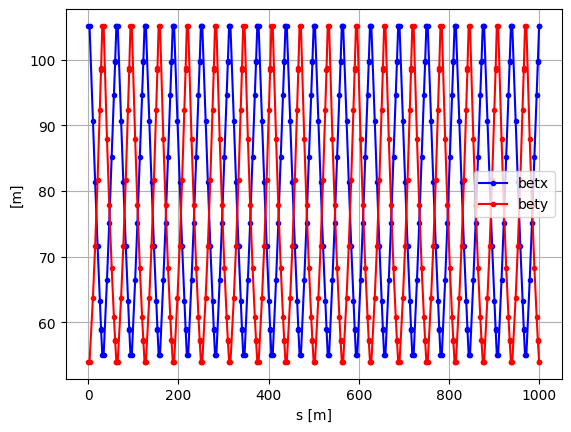

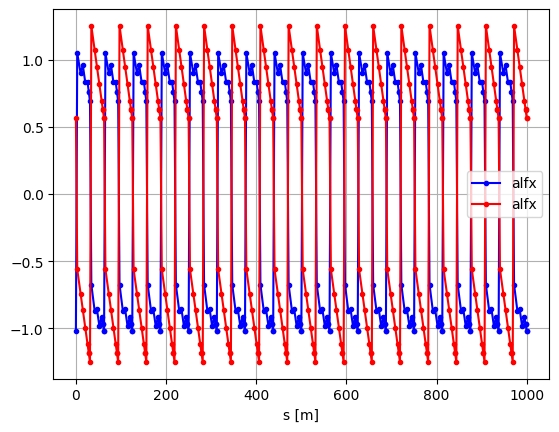

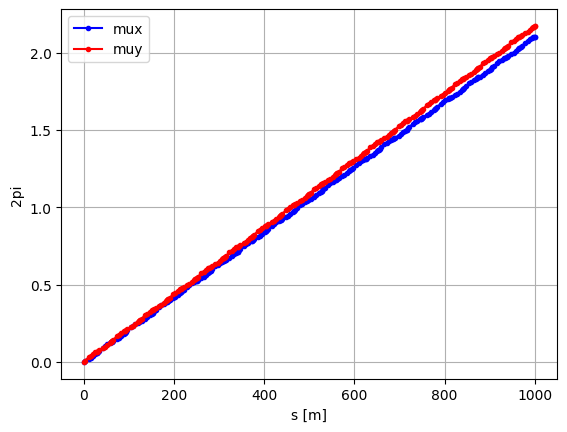

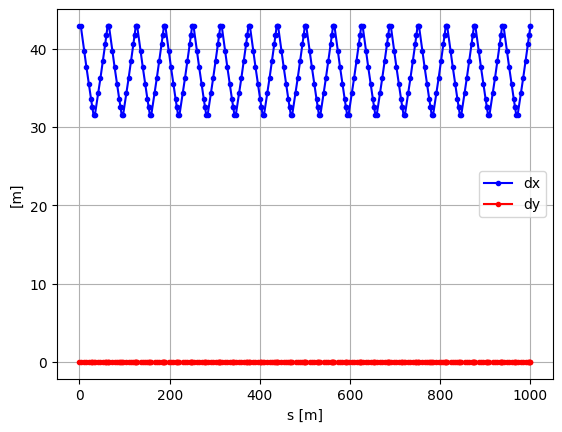

In [8]:
myTwiss= line2.twiss(method='4d')
plot_me(myTwiss)
print(myTwiss.dqx,'  ', myTwiss.dqy)
print(myTwiss.betx[0],'  ', myTwiss.bety[8])

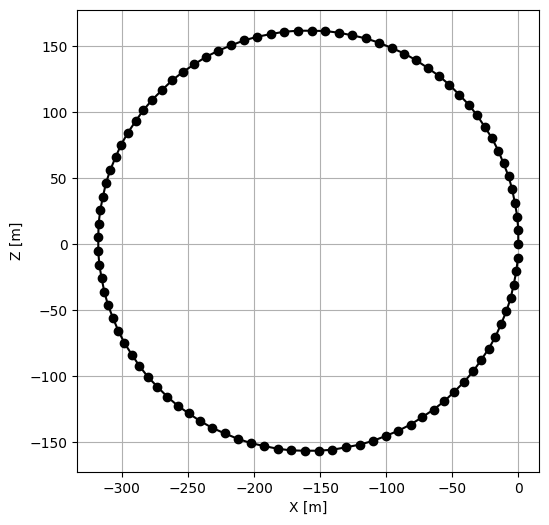

In [9]:
mySurvey = line2.survey()
mySurvey = mySurvey.rows[r'^(mq|mb).*']
fig, ax = plt.subplots(figsize=(9, 6))
plt.plot(mySurvey.X, mySurvey.Z, 'o-', label="x", c="k")
plt.axis('square')
plt.xlabel('X [m]')
plt.ylabel('Z [m]')
plt.grid()
# %%
myTwiss= line.twiss(method='4d')